# Importando todas as bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

## 1. importando planilhas e visualizando conteúdo

In [4]:
planilhas = ["antivirus", "ativos_monitorados", "incidentes", "plataformas", "usuarios"]

for i in planilhas:
     display(pd.read_csv(f"./mnt/data/{i}.csv", delimiter=","))

,id_ativo,id_antivirus,nome
0,1,1,Bitdefender
1,2,2,Norton
2,3,3,ESET
3,4,4,Bitdefender
4,5,5,Bitdefender
...,...,...,...
20058,20059,20059,Kaspersky
20059,20060,20060,Norton
20060,20061,20061,ESET
20061,20062,20062,ESET


,id_usuario,id_ativo,nome,sistema_operacional_e_versao
0,1,1,MacBook,macOS Ventura
1,1,2,Servidor,Ubuntu 22.04
2,1,3,iPhone,iOS 16
3,2,4,iPhone,iOS 17
4,2,5,iPhone,iOS 16
...,...,...,...,...
20058,9998,20059,MacBook,macOS Monterey
20059,9998,20060,Celular,Android 14
20060,9999,20061,Servidor,Ubuntu 22.04
20061,10000,20062,MacBook,macOS Monterey


,id_usuario,id_incidente,descricao,duracao,data_e_hora,status
0,1,1,Phishing,384,2023-11-17 20:38:25,solucionado
1,2,2,DDoS Attack,2860,2024-09-25 21:13:42,não solucionado
2,3,3,Ransomware,3472,2024-10-19 12:54:11,solucionado
3,4,4,Account Takeover,3398,2024-03-28 03:05:39,não solucionado
4,5,5,Malware Detection,3504,2024-03-21 20:12:11,solucionado
...,...,...,...,...,...,...
30031,9998,30032,Phishing,571,2024-06-06 03:41:43,solucionado
30032,9999,30033,Zero-Day Exploit,2560,2024-08-08 07:10:19,solucionado
30033,9999,30034,SQL Injection,3413,2024-03-12 20:15:32,não solucionado
30034,9999,30035,Account Takeover,2327,2023-05-17 13:51:28,não solucionado


,id_ativo,id_plataforma,categoria
0,1,1,Social Media
1,2,2,Gaming
2,3,3,E-commerce
3,4,4,E-commerce
4,5,5,Email
...,...,...,...
20058,20059,20059,E-commerce
20059,20060,20060,Email
20060,20061,20061,Email
20061,20062,20062,Streaming


,id_usuario,nome,idade,cep,data_de_nascimento,renda
0,1,Sarah Caldeira,49,05404-010,1975-11-09,13431.34
1,2,Dr. Luiz Otávio Vargas,42,04105-010,1983-04-28,9792.60
2,3,Srta. Marcela Pereira,28,02862-120,1996-10-20,1929.75
3,4,Dr. Luigi Garcia,27,04836-110,1997-05-22,2267.47
4,5,Antonella da Mata,60,04836-110,1965-01-08,2906.67
...,...,...,...,...,...,...
9995,9996,Alexia Pinto,53,02862-120,1971-12-16,1934.22
9996,9997,Zoe Pacheco,42,05001-100,1982-07-01,9081.38
9997,9998,Alice Gonçalves,69,05404-010,1956-04-10,16306.19
9998,9999,Dr. Danilo Porto,43,04812-000,1982-01-21,2276.55


## 2. Tratamento de dados

In [5]:
for i in planilhas:
     # Verificando se há dados nulos
     display(pd.read_csv(f"./mnt/data/{i}.csv", delimiter=",").isnull().sum())
     # Verificando se há duplicatas
     display(pd.read_csv(f"./mnt/data/{i}.csv", delimiter=",").duplicated().sum())

id_ativo        0
id_antivirus    0
nome            0
dtype: int64

np.int64(0)

id_usuario                      0
id_ativo                        0
nome                            0
sistema_operacional_e_versao    0
dtype: int64

np.int64(0)

id_usuario      0
id_incidente    0
descricao       0
duracao         0
data_e_hora     0
status          0
dtype: int64

np.int64(0)

id_ativo         0
id_plataforma    0
categoria        0
dtype: int64

np.int64(0)

id_usuario            0
nome                  0
idade                 0
cep                   0
data_de_nascimento    0
renda                 0
dtype: int64

np.int64(0)

``` Transforma em variáveis ```

In [6]:
for i in planilhas:
    if i == "usuarios":
        usuarios = pd.read_csv(f"./mnt/data/{i}.csv", delimiter=",")
    elif i == "antivirus":
        antivirus = pd.read_csv(f"./mnt/data/{i}.csv", delimiter=",")
    elif i == "ativos_monitorados":
        ativos = pd.read_csv(f"./mnt/data/{i}.csv", delimiter=",")
    elif i == "incidentes":
        incidentes = pd.read_csv(f"./mnt/data/{i}.csv", delimiter=",")
    elif i == "plataformas":
        plataformas = pd.read_csv(f"./mnt/data/{i}.csv", delimiter=",")
    else:
        print("Erro planilha em excesso")

## 3. Unindo todas as tabelas

In [7]:
# DataFrame após unir usuário e incidentes:
usuario_incidentes = pd.merge(usuarios, incidentes, on='id_usuario', how='left')

#DataFrame após unir usuário, incidentes e ativos
usuario_incidentes_ativos = pd.merge(usuario_incidentes, ativos, on='id_usuario', how='left')

#DataFrame após unir usuário, incidentes, ativos e plataformas
final_temp = pd.merge(usuario_incidentes_ativos, plataformas, on='id_ativo', how='left')

# DataFrame final com todas as informações:
df = pd.merge(final_temp, antivirus, on='id_ativo', how='left')


In [8]:
display(df)

,id_usuario,nome_x,idade,cep,data_de_nascimento,renda,id_incidente,descricao,duracao,data_e_hora,status,id_ativo,nome_y,sistema_operacional_e_versao,id_plataforma,categoria,id_antivirus,nome
0,1,Sarah Caldeira,49,05404-010,1975-11-09,13431.34,1,Phishing,384,2023-11-17 20:38:25,solucionado,1,MacBook,macOS Ventura,1,Social Media,1,Bitdefender
1,1,Sarah Caldeira,49,05404-010,1975-11-09,13431.34,1,Phishing,384,2023-11-17 20:38:25,solucionado,2,Servidor,Ubuntu 22.04,2,Gaming,2,Norton
2,1,Sarah Caldeira,49,05404-010,1975-11-09,13431.34,1,Phishing,384,2023-11-17 20:38:25,solucionado,3,iPhone,iOS 16,3,E-commerce,3,ESET
3,2,Dr. Luiz Otávio Vargas,42,04105-010,1983-04-28,9792.60,2,DDoS Attack,2860,2024-09-25 21:13:42,não solucionado,4,iPhone,iOS 17,4,E-commerce,4,Bitdefender
4,2,Dr. Luiz Otávio Vargas,42,04105-010,1983-04-28,9792.60,2,DDoS Attack,2860,2024-09-25 21:13:42,não solucionado,5,iPhone,iOS 16,5,Email,5,Bitdefender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60285,9999,Dr. Danilo Porto,43,04812-000,1982-01-21,2276.55,30033,Zero-Day Exploit,2560,2024-08-08 07:10:19,solucionado,20061,Servidor,Ubuntu 22.04,20061,Email,20061,ESET
60286,9999,Dr. Danilo Porto,43,04812-000,1982-01-21,2276.55,30034,SQL Injection,3413,2024-03-12 20:15:32,não solucionado,20061,Servidor,Ubuntu 22.04,20061,Email,20061,ESET
60287,9999,Dr. Danilo Porto,43,04812-000,1982-01-21,2276.55,30035,Account Takeover,2327,2023-05-17 13:51:28,não solucionado,20061,Servidor,Ubuntu 22.04,20061,Email,20061,ESET
60288,10000,Rhavi Cirino,52,05002-000,1973-04-28,9692.21,30036,Phishing,286,2023-09-03 06:17:16,solucionado,20062,MacBook,macOS Monterey,20062,Streaming,20062,ESET


``` Convertendo datas ```

In [ ]:
df['data_e_hora'] = pd.to_datetime(df['data_e_hora'], errors='coerce')
df['ano'] = df['data_e_hora'].dt.year
df['mes'] = df['data_e_hora'].dt.month

## 4. Análise Preditiva

```  Prever o aumento de crimes cibernéticos nos próximos anos ```

In [ ]:
# Evolução de incidentes por ano
attacks_per_year = df['ano'].value_counts().sort_index()

# Prevendo quantidade de ataques futuros
X_years = np.array(attacks_per_year.index).reshape(-1,1)
y_attacks = attacks_per_year.values

reg = LinearRegression()
reg.fit(X_years, y_attacks)

# Prevendo categoria do incidente baseado em localização e mês
df_pred = df[['cep', 'ano', 'mes', 'categoria']].dropna()

# Encode
le_cep = LabelEncoder()
le_cat = LabelEncoder()

df_pred['cep_enc'] = le_cep.fit_transform(df_pred['cep'])
df_pred['categoria_enc'] = le_cat.fit_transform(df_pred['categoria'])

X = df_pred[['cep_enc', 'ano', 'mes']]
y = df_pred['categoria_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
confusion = confusion_matrix(y_test, y_pred)

``` Exemplo para aumento nos próximos 3 anos```

In [ ]:
# Variáveis para prever
future_years = np.array([2025, 2026, 2027]).reshape(-1,1)
future_preds = reg.predict(future_years)

In [ ]:
display(dict(zip(future_years.flatten(), future_preds.round(0).astype(int))))

{np.int64(2025): np.int64(14943),
 np.int64(2026): np.int64(9789),
 np.int64(2027): np.int64(4635)}

```  Prever se um CEP vai ter alto risco ou não ```

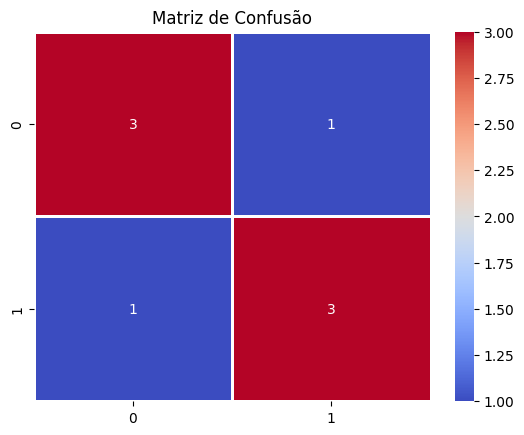

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



In [ ]:
# Classifica: acima da média = Alto Risco (1), abaixo = Baixo Risco (0)
cep_counts = df['cep'].value_counts()
mean_incidents = cep_counts.mean()
high_risk_ceps = (cep_counts > mean_incidents).astype(int)

# Prepara os dados
cep_risk_df = pd.DataFrame({
    'cep': cep_counts.index,
    'incidentes': cep_counts.values,
    'risco_alto': (cep_counts.values > mean_incidents).astype(int)
})

# Encoding do CEP
cep_risk_df['cep_enc'] = le_cep.transform(cep_risk_df['cep'])

X_risk = cep_risk_df[['cep_enc']]
y_risk = cep_risk_df['risco_alto']

X_risk_train, X_risk_test, y_risk_train, y_risk_test = train_test_split(X_risk, y_risk, test_size=0.3, random_state=42)

risk_model = RandomForestClassifier(random_state=42)
risk_model.fit(X_risk_train, y_risk_train)

# Prever nos dados de teste
y_risk_pred = risk_model.predict(X_risk_test)

risk_report = classification_report(y_risk_test, y_risk_pred)
risk_confusion = confusion_matrix(y_risk_test, y_risk_pred)

# Resultados

sns.heatmap(risk_confusion, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.title("Matriz de Confusão")
plt.show()

print(risk_report)


``` Exemplo para testar risco com CEP da Base de dados```

In [ ]:
def testar_risco_cep(cep):
    try:
        cep_codificado = le_cep.transform([cep])
        risco_predito = risk_model.predict([cep_codificado])[0]
        
        if risco_predito == 1:
            print(f"O CEP {cep} é classificado como: ALTO RISCO 🚨")
        else:
            print(f"O CEP {cep} é classificado como: BAIXO RISCO ✅")
    except ValueError:
        print(f"CEP {cep} não encontrado nos dados usados para treinamento.")


testar_risco_cep('04105-010')

O CEP 04105-010 é classificado como: ALTO RISCO 🚨


c:\Users\Robson\OneDrive - Cruzeiro do Sul Educacional - Acadêmico\Faculdade\Banco de dados\Faculdade\dataExercise\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
